In [1]:
import compton.Dataloader as dl
from compton.Functions import *
from compton.Analysis import *
import os
from sympy import symbols, Eq, latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
print(os.getcwd())

/home/lucas/repos/advanced_exp/FAFO


In [3]:
data = dl.load_gamma_count('../Databases/Compton/BBL_S0_A0.csv')
display(data)

,Channel,Energy (keV),Counts
0,1,0.755920,0
1,2,1.511840,0
2,3,2.267760,0
3,4,3.023679,0
4,5,3.779599,0
...,...,...,...
1019,1020,771.038271,36
1020,1021,771.794191,34
1021,1022,772.550111,39
1022,1023,773.306031,51


In [4]:
display(data)
channel = data['Channel']
energy = data['Energy (keV)']
count = data['Counts']

,Channel,Energy (keV),Counts
0,1,0.755920,0
1,2,1.511840,0
2,3,2.267760,0
3,4,3.023679,0
4,5,3.779599,0
...,...,...,...
1019,1020,771.038271,36
1020,1021,771.794191,34
1021,1022,772.550111,39
1022,1023,773.306031,51


In [5]:
angles = range(0,140, 10)
all_info = []

for ii in range(len(angles)):
    data = dl.load_gamma_count('../Databases/Compton/BBL_S1_A' + str(angles[ii]) + '.csv')
    all_info.append(data)

In [6]:
print(len(all_info))

14


In [7]:
# control = pd.read_csv('../Databases/Compton/BBL_S0_A0.csv', skiprows=8)

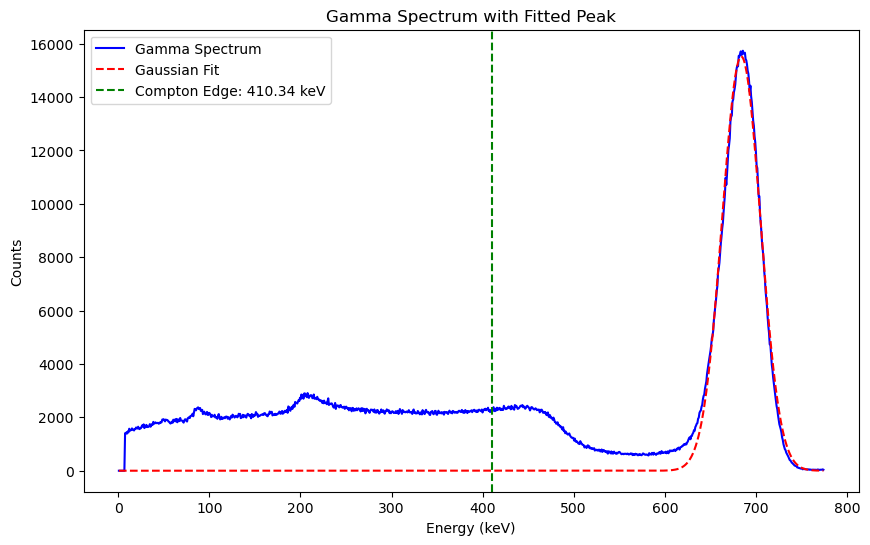

In [8]:
from scipy.optimize import curve_fit

def gaussian(x, a, mu, sigma):
    return a * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def compton_edge(E_gamma, m_e=511):
    return E_gamma / (1 + (E_gamma / (2 * m_e)))

# Load data
control = dl.load_gamma_count('../Databases/Compton/BBL_S0_A0.csv')

data = control.values  # Convert DataFrame to NumPy array
energy = data[:, 1]  # Energy values
counts = data[:, 2]  # Counts

# Plot raw data
plt.figure(figsize=(10, 6))
plt.plot(energy, counts, label='Gamma Spectrum', color='blue')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Gamma Spectrum with Fitted Peak')

# Fit Gaussian to the peak region
peak_idx = np.argmax(counts)
peak_energy = energy[peak_idx]
initial_guess = [max(counts), peak_energy, 50]  # Amplitude, mean, std dev
popt, _ = curve_fit(gaussian, energy, counts, p0=initial_guess)

# Plot Gaussian fit
fit_x = np.linspace(min(energy), max(energy), 1000)
fit_y = gaussian(fit_x, *popt)
plt.plot(fit_x, fit_y, label='Gaussian Fit', color='red', linestyle='--')

# Estimate and mark the Compton edge
comp_edge = compton_edge(peak_energy)
plt.axvline(comp_edge, color='green', linestyle='dashed', label=f'Compton Edge: {comp_edge:.2f} keV')

plt.legend()
plt.show()


In [10]:
mins = minimum_energy_S1()
trimmed_info = trim_S1_dfs(all_info, mins)
peaks = run_all_S1_fits(trimmed_info)
display(peaks)

,Angle,Mean,Sigma
0,0,679.024209,20.965984
1,10,679.363263,20.830414
2,20,671.996346,24.865701
3,30,552.004679,83.728828
4,40,512.311407,48.517290
5,50,460.637602,44.049612
6,60,414.775859,40.877019
7,70,373.127971,35.108277
8,80,334.446969,29.642788
9,90,303.639359,25.731244
